# Titanic Dataset Analysis
**Author:** Trent Rueckert  
**Date:** March 21, 2025  
**Objective:** Analyze the Titanic dataset to predict survival.

## Introduction
In this notebook, I will analyze the Titanic dataset to predict survival by preparing/exploring the data, cleaning the data/handling missing values, performing feature engineering, and training machine learning models.

## Imports
Import the necessary libraries with the code below.

In [32]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

## Section 1. Import and Inspect the Data
### 1.1 Load the dataset, display basic info, and display the first 10 rows

In [22]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [23]:
# Display basic info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [24]:
# Display the first 10 rows
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

### 1.2 Check for missing values and display summary statistics

In [25]:
# Check for missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [26]:
# Display summary statistics
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### 1.3 Check for correlations using only numeric features

In [27]:
# Check for correlations
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


### Reflection 1
1) How many data instances are there? **891**
2) How many features are there? **15**
3) What are the names? **'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'.**
4) Are there any missing values? **Yes, 177 in the 'age' column, 688 in the 'deck' column, 2 in the 'embarked' column, and 2 in the 'embark_town' column.**
5) Are there any non-numeric features? **Yes, 'sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'.**
6) Are the data instances sorted on any of the attributes? **No, it is not sorted by an of the attributes.**
7) What are the units of age? **Years**
8) What are the minimum, median and max age? **Minimum: 0.42, median: 28, maximum: 80.**
9) What two different features have the highest correlation? **'Parch' and "sibsp' with 0.41.**
10) Are there any categorical features that might be useful for prediction? **'sex', 'embarked', 'pclass', 'who'.**

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

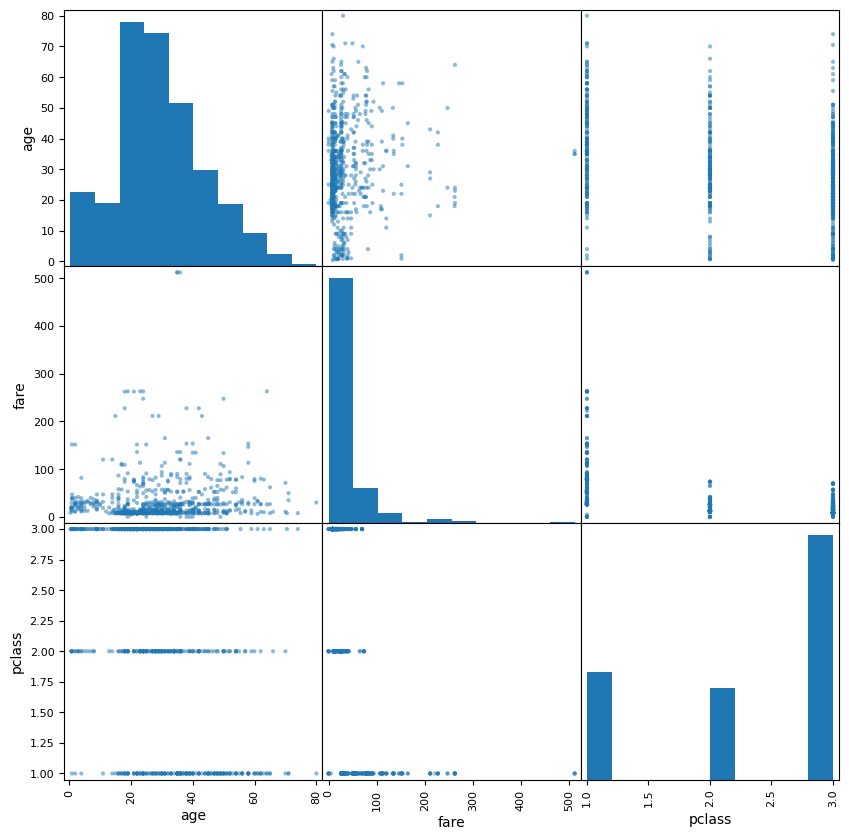

In [11]:
# Create a scatter matrix
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

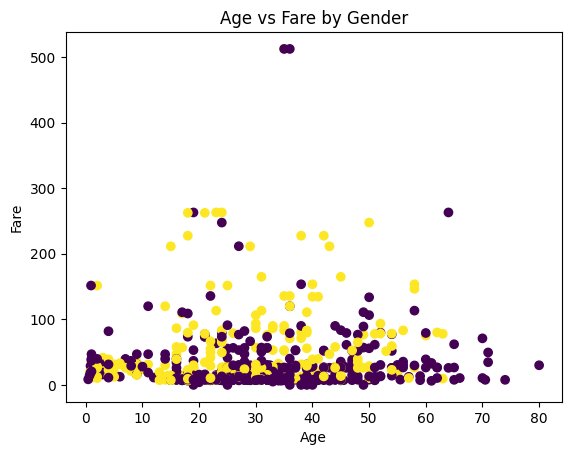

In [12]:
# Create a scatter plot of age vs fare, colored by gender
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

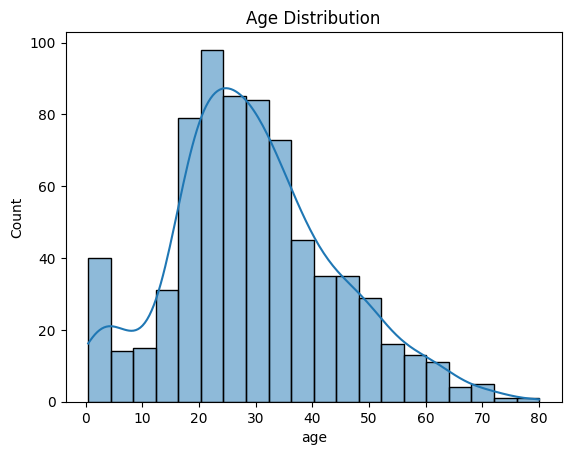

In [13]:
# Create a histogram of age
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

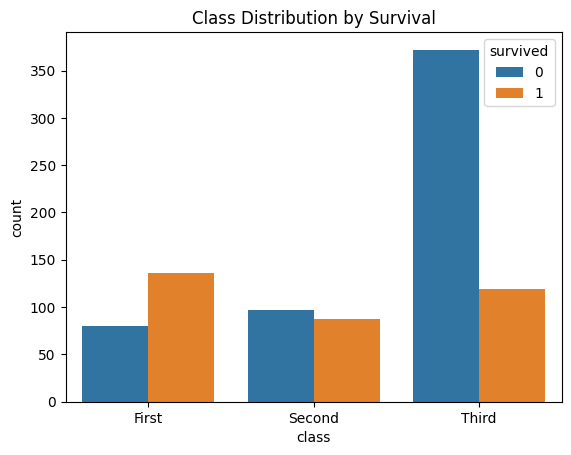

In [14]:
# Create a count plot for class and survival
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

### Reflection 2.1
1. What patterns or anomalies do you notice? **Most of the passengers were in the third class and that's where the lowest survival rate was.**
2. Do any features stand out as potential predictors? **'pclass', 'sex', and 'age'.**
3. Are there any visible class imbalances? **Yes, most passengers were in the third class.**

### 2.2 Handle Missing Values and Clean Data

In [15]:
# Age was missing values. Impute missing values for age using the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Embark_town was missing values. Drop missing values for embark_town (or fill with mode)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\trent\AppData\Local\Temp\ipykernel_6820\201309849.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\trent\AppData\Local\Temp\ipykernel_6820\201309849.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


### 2.3 Feature Engineering

In [16]:
# Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [ ]:
# Convert categorical data to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [18]:
# Create a binary feature for 'alone'
titanic['alone'] = titanic['alone'].astype(int)

### Reflection 2.3
1. Why might family size be a useful feature for predicting survival? **People traveling together may be more likely to survive because they look out for one another.**
2. Why convert categorical data to numeric? **For the models to be able to work with the data properly.**

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target
For classification, we’ll use survived as the target variable.
Input features: age, fare, pclass, sex, family_size
Target: survived

In [19]:
# Assign input features to X, target variable to y
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

### Reflection 3:
1. Why are these features selected? **These are the features that help us understand who had a higher chance at survival.**
2. Are there any features that are likely to be highly predictive of survival? **Yes, 'sex', 'pclass', and 'family_size'.**

## Section 4: Splitting Data

### 4.1 Basic Train/Test Split

In [31]:
# Split the data into training and test sets using train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 5), (179, 5), (712,), (179,))

### 4.2 Stratified Train/Test split
Split the data into training and test sets using StratifiedShuffleSplit

In [33]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### 4.3 Compare Results

In [34]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


### Reflection 4:
1. Why might stratification improve model performance? **Stratification ensures that the training and test sets have the same class distribution as the original dataset.**
2. How close are the training and test distributions to the original dataset? **The stratified split keeps them pretty close to the original distribution.**
3. Which split method produced better class balance? **The stratified split produced better balance between classes in the training and test sets compared to the basic train/test split method.**